# Final Project Notebook - Spring 2024

In [3]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [4]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(20, 20)
    plt.show()

In [5]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

<ipython-input-5-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


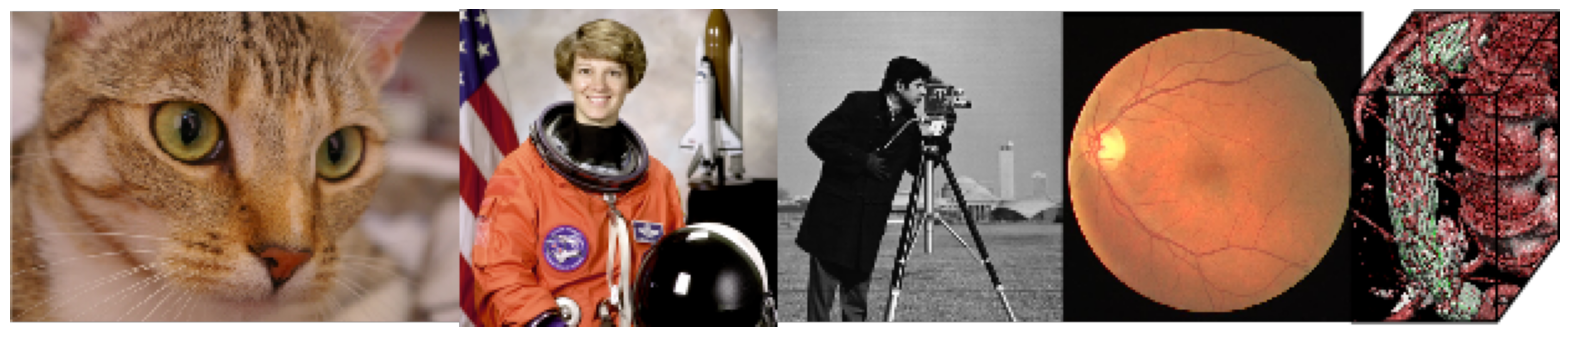

In [6]:
plot(im)

In [7]:
net = alexnet(pretrained=True).cuda(0)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 96.5MB/s]


In [8]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [9]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

<ipython-input-9-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


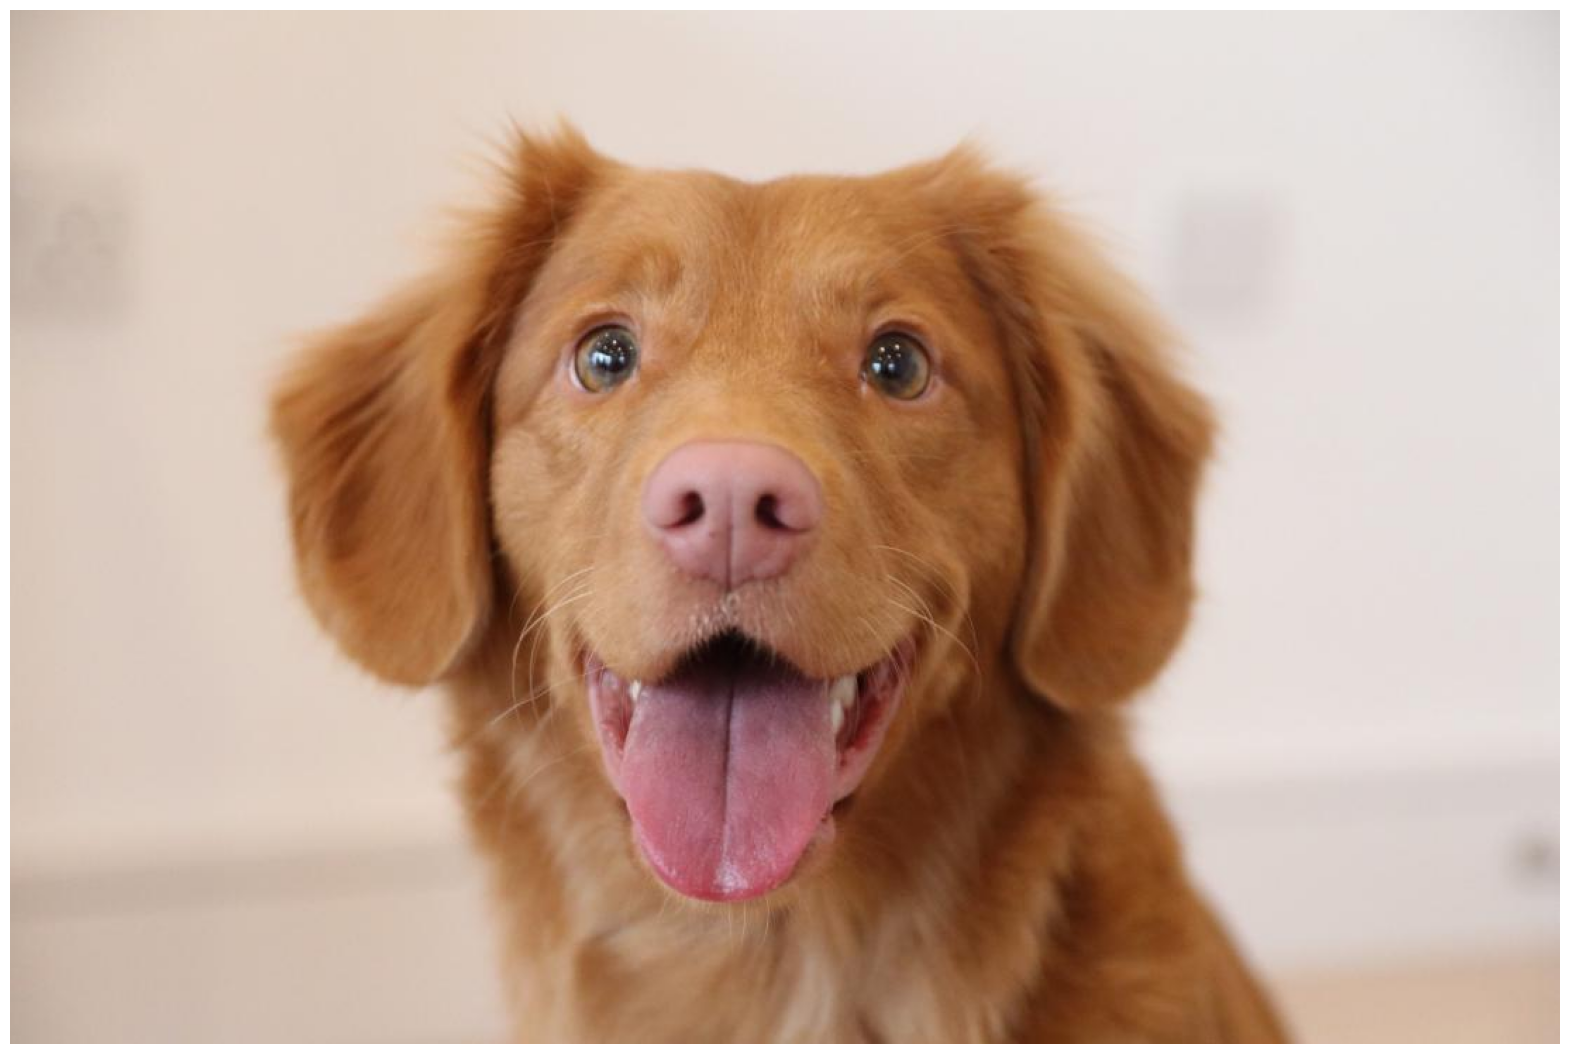

In [10]:
plot(im)

In [11]:
image = Image.fromarray(im) #convert to pil

In [12]:
img_tensor = preprocess(image)

In [13]:
img_tensor = img_tensor.unsqueeze_(0)

In [14]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [15]:
img_variable = torch.tensor(img_tensor).cuda(0)

<ipython-input-15-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [16]:
out = net(img_variable)

In [17]:
label_index = out.cpu().data.numpy().argmax()

In [18]:
label_index

207

In [19]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [20]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [21]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [22]:
print(labels[label_index])

golden retriever


In [23]:
for i in range(10):
    print(labels[top_list[i]])

golden retriever
Brittany spaniel
Sussex spaniel
clumber, clumber spaniel
tennis ball
Irish setter, red setter
vizsla, Hungarian pointer
cocker spaniel, English cocker spaniel, cocker
Tibetan mastiff
Labrador retriever


In [24]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [26]:
out = net.features[0](img_variable).cpu().detach().numpy()

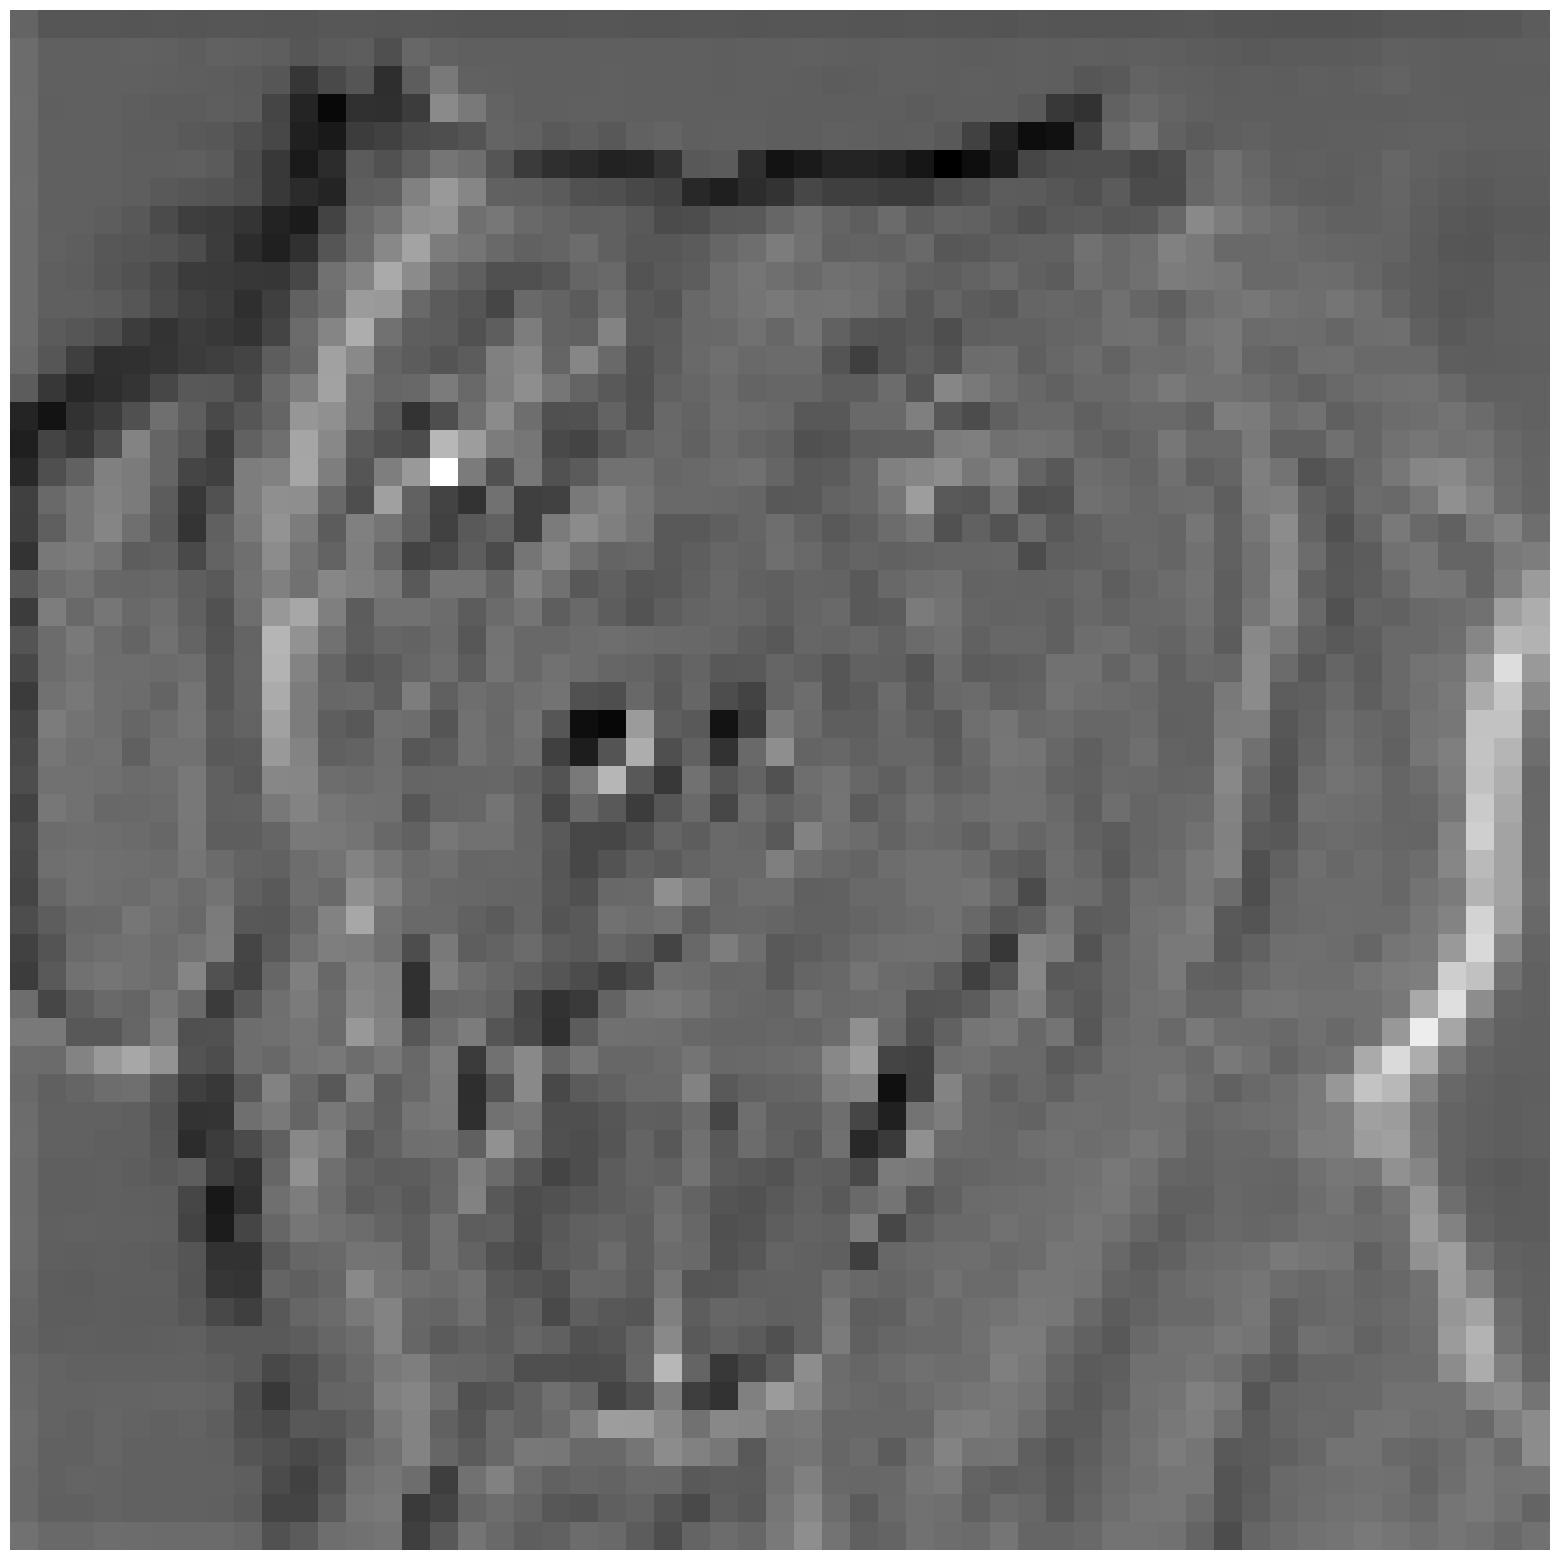

In [27]:
plot(out[0,0,:,:])

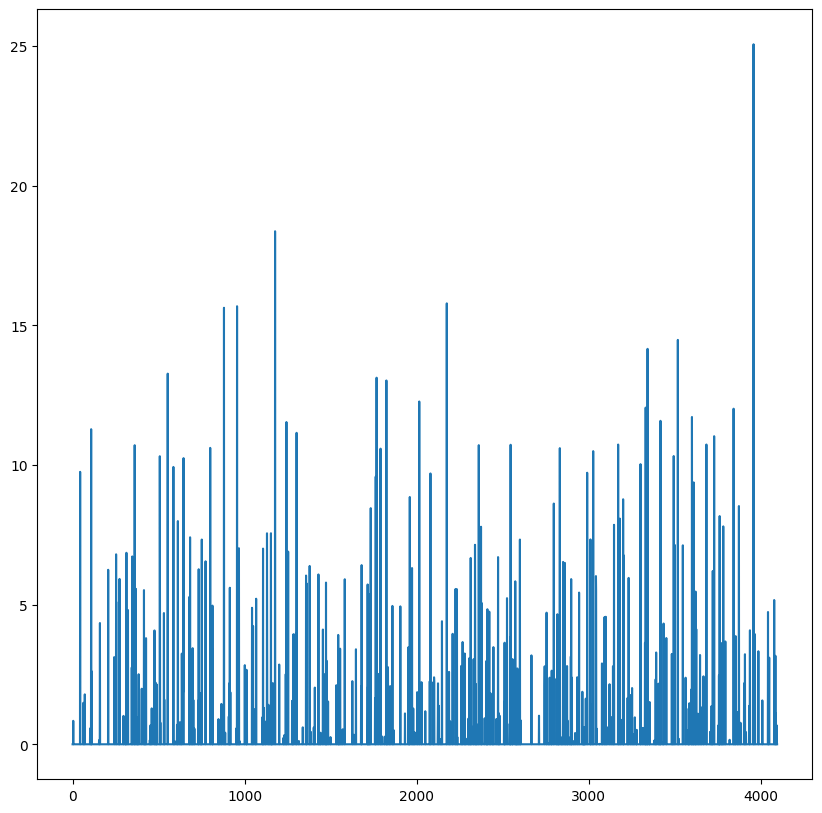

In [28]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [29]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

<ipython-input-29-db4016f420a5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')


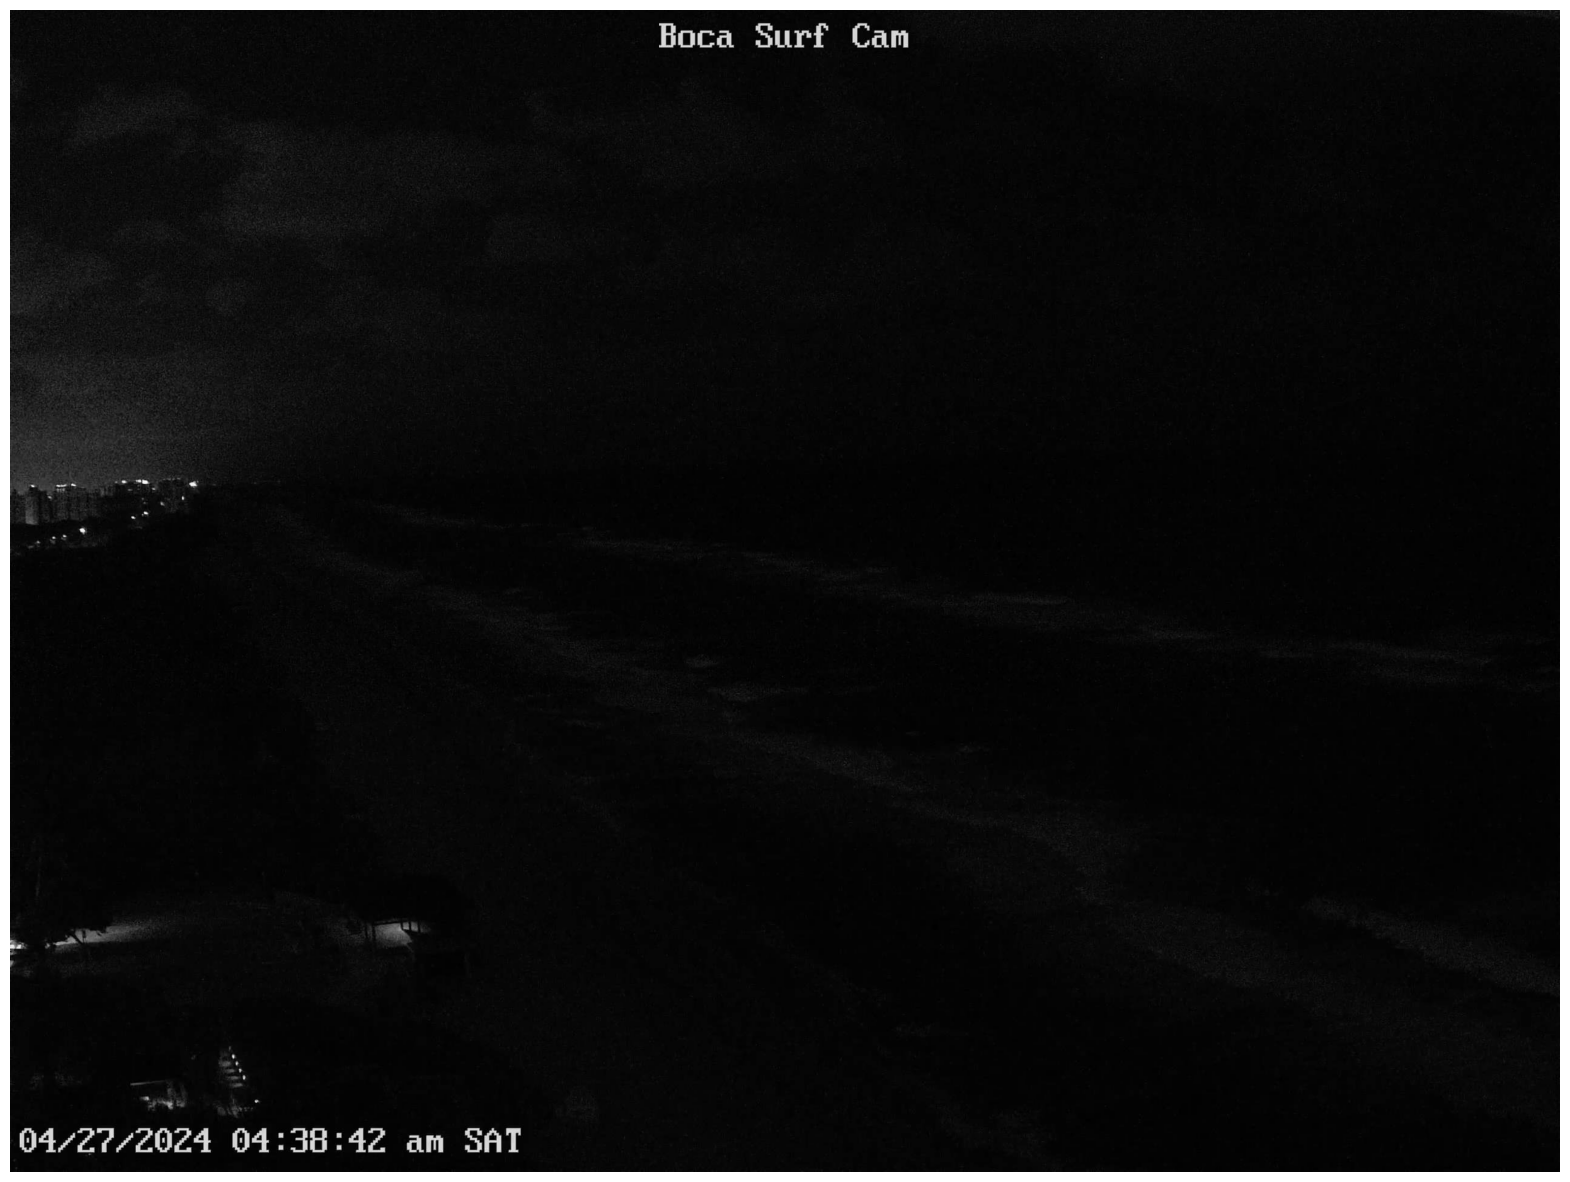

In [30]:
plot(im)

In [31]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [32]:
out = net(load_im(im))

<ipython-input-31-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [33]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
        print(labels[top_list[i]])

In [34]:
inference(im)

nematode, nematode worm, roundworm
____
nematode, nematode worm, roundworm
matchstick
spotlight, spot
digital clock
stove
projector
lighter, light, igniter, ignitor
hammerhead, hammerhead shark
syringe
window shade


<ipython-input-31-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [35]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [36]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [37]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [38]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [39]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [40]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://fau-my.sharepoint.com/:p:/g/personal/alexisl2023_fau_edu/EfL6iVA7jWRBnilSR6H2Ys0BLffxrRdgvutEoEZjVZxI_A?e=TdtL6c"

In [43]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

PDFPageCountError: Unable to get page count.
Syntax Warning: May not be a PDF file (continuing anyway)
Syntax Error (2): Illegal character <21> in hex string
Syntax Error (4): Illegal character <4f> in hex string
Syntax Error (6): Illegal character <54> in hex string
Syntax Error (7): Illegal character <59> in hex string
Syntax Error (8): Illegal character <50> in hex string
Syntax Error (11): Illegal character <68> in hex string
Syntax Error (12): Illegal character <74> in hex string
Syntax Error (13): Illegal character <6d> in hex string
Syntax Error (14): Illegal character <6c> in hex string
Syntax Error (17): Illegal character <68> in hex string
Syntax Error (18): Illegal character <74> in hex string
Syntax Error (19): Illegal character <6d> in hex string
Syntax Error (20): Illegal character <6c> in hex string
Syntax Error (22): Illegal character <6c> in hex string
Syntax Error (24): Illegal character <6e> in hex string
Syntax Error (25): Illegal character <67> in hex string
Syntax Error (26): Illegal character <3d> in hex string
Syntax Error (27): Illegal character <22> in hex string
Syntax Error (29): Illegal character <6e> in hex string
Syntax Error (30): Illegal character <22> in hex string
Syntax Error (33): Illegal character <68> in hex string
Syntax Error (39): Illegal character <6d> in hex string
Syntax Error (41): Illegal character <74> in hex string
Syntax Error (44): Illegal character <6e> in hex string
Syntax Error (46): Illegal character <6d> in hex string
Syntax Error (48): Illegal character <3d> in hex string
Syntax Error (49): Illegal character <22> in hex string
Syntax Error (52): Illegal character <73> in hex string
Syntax Error (54): Illegal character <72> in hex string
Syntax Error (55): Illegal character <69> in hex string
Syntax Error (56): Illegal character <70> in hex string
Syntax Error (57): Illegal character <74> in hex string
Syntax Error (58): Illegal character <69> in hex string
Syntax Error (59): Illegal character <6f> in hex string
Syntax Error (60): Illegal character <6e> in hex string
Syntax Error (61): Illegal character <22> in hex string
Syntax Error (64): Illegal character <6f> in hex string
Syntax Error (65): Illegal character <6e> in hex string
Syntax Error (66): Illegal character <74> in hex string
Syntax Error (68): Illegal character <6e> in hex string
Syntax Error (69): Illegal character <74> in hex string
Syntax Error (70): Illegal character <3d> in hex string
Syntax Error (71): Illegal character <22> in hex string
Syntax Error (72): Illegal character <57> in hex string
Syntax Error (76): Illegal character <77> in hex string
Syntax Error (77): Illegal character <6f> in hex string
Syntax Error (78): Illegal character <72> in hex string
Syntax Error (81): Illegal character <70> in hex string
Syntax Error (82): Illegal character <72> in hex string
Syntax Error (83): Illegal character <6f> in hex string
Syntax Error (86): Illegal character <73> in hex string
Syntax Error (87): Illegal character <73> in hex string
Syntax Error (88): Illegal character <69> in hex string
Syntax Error (89): Illegal character <6e> in hex string
Syntax Error (90): Illegal character <67> in hex string
Syntax Error (91): Illegal character <2c> in hex string
Syntax Error (93): Illegal character <70> in hex string
Syntax Error (94): Illegal character <72> in hex string
Syntax Error (96): Illegal character <73> in hex string
Syntax Error (98): Illegal character <6e> in hex string
Syntax Error (99): Illegal character <74> in hex string
Syntax Error (101): Illegal character <74> in hex string
Syntax Error (102): Illegal character <69> in hex string
Syntax Error (103): Illegal character <6f> in hex string
Syntax Error (104): Illegal character <6e> in hex string
Syntax Error (105): Illegal character <73> in hex string
Syntax Error (108): Illegal character <6e> in hex string
Syntax Error (111): Illegal character <73> in hex string
Syntax Error (112): Illegal character <70> in hex string
Syntax Error (113): Illegal character <72> in hex string
Syntax Error (117): Illegal character <73> in hex string
Syntax Error (118): Illegal character <68> in hex string
Syntax Error (121): Illegal character <74> in hex string
Syntax Error (122): Illegal character <73> in hex string
Syntax Error (123): Illegal character <22> in hex string
Syntax Error (126): Illegal character <6d> in hex string
Syntax Error (128): Illegal character <74> in hex string
Syntax Error (131): Illegal character <6e> in hex string
Syntax Error (133): Illegal character <6d> in hex string
Syntax Error (135): Illegal character <3d> in hex string
Syntax Error (136): Illegal character <22> in hex string
Syntax Error (137): Illegal character <76> in hex string
Syntax Error (138): Illegal character <69> in hex string
Syntax Error (140): Illegal character <77> in hex string
Syntax Error (141): Illegal character <70> in hex string
Syntax Error (142): Illegal character <6f> in hex string
Syntax Error (143): Illegal character <72> in hex string
Syntax Error (144): Illegal character <74> in hex string
Syntax Error (145): Illegal character <22> in hex string
Syntax Error (148): Illegal character <6f> in hex string
Syntax Error (149): Illegal character <6e> in hex string
Syntax Error (150): Illegal character <74> in hex string
Syntax Error (152): Illegal character <6e> in hex string
Syntax Error (153): Illegal character <74> in hex string
Syntax Error (154): Illegal character <3d> in hex string
Syntax Error (155): Illegal character <22> in hex string
Syntax Error (156): Illegal character <77> in hex string
Syntax Error (157): Illegal character <69> in hex string
Syntax Error (159): Illegal character <74> in hex string
Syntax Error (160): Illegal character <68> in hex string
Syntax Error (161): Illegal character <3d> in hex string
Syntax Error (164): Illegal character <76> in hex string
Syntax Error (165): Illegal character <69> in hex string
Syntax Error (168): Illegal character <2d> in hex string
Syntax Error (169): Illegal character <77> in hex string
Syntax Error (170): Illegal character <69> in hex string
Syntax Error (172): Illegal character <74> in hex string
Syntax Error (173): Illegal character <68> in hex string
Syntax Error (174): Illegal character <2c> in hex string
Syntax Error (176): Illegal character <69> in hex string
Syntax Error (177): Illegal character <6e> in hex string
Syntax Error (178): Illegal character <69> in hex string
Syntax Error (179): Illegal character <74> in hex string
Syntax Error (180): Illegal character <69> in hex string
Syntax Error (182): Illegal character <6c> in hex string
Syntax Error (183): Illegal character <2d> in hex string
Syntax Error (184): Illegal character <73> in hex string
Syntax Error (187): Illegal character <6c> in hex string
Syntax Error (189): Illegal character <3d> in hex string
Syntax Error (191): Illegal character <2e> in hex string
Syntax Error (193): Illegal character <2c> in hex string
Syntax Error (195): Illegal character <6d> in hex string
Syntax Error (197): Illegal character <78> in hex string
Syntax Error (198): Illegal character <69> in hex string
Syntax Error (199): Illegal character <6d> in hex string
Syntax Error (200): Illegal character <75> in hex string
Syntax Error (201): Illegal character <6d> in hex string
Syntax Error (202): Illegal character <2d> in hex string
Syntax Error (203): Illegal character <73> in hex string
Syntax Error (206): Illegal character <6c> in hex string
Syntax Error (208): Illegal character <3d> in hex string
Syntax Error (210): Illegal character <2e> in hex string
Syntax Error (212): Illegal character <2c> in hex string
Syntax Error (214): Illegal character <6d> in hex string
Syntax Error (215): Illegal character <69> in hex string
Syntax Error (216): Illegal character <6e> in hex string
Syntax Error (217): Illegal character <69> in hex string
Syntax Error (218): Illegal character <6d> in hex string
Syntax Error (219): Illegal character <75> in hex string
Syntax Error (220): Illegal character <6d> in hex string
Syntax Error (221): Illegal character <2d> in hex string
Syntax Error (222): Illegal character <73> in hex string
Syntax Error (225): Illegal character <6c> in hex string
Syntax Error (227): Illegal character <3d> in hex string
Syntax Error (229): Illegal character <2e> in hex string
Syntax Error (231): Illegal character <2c> in hex string
Syntax Error (233): Illegal character <75> in hex string
Syntax Error (234): Illegal character <73> in hex string
Syntax Error (236): Illegal character <72> in hex string
Syntax Error (237): Illegal character <2d> in hex string
Syntax Error (238): Illegal character <73> in hex string
Syntax Error (241): Illegal character <6c> in hex string
Syntax Error (244): Illegal character <6c> in hex string
Syntax Error (246): Illegal character <3d> in hex string
Syntax Error (248): Illegal character <22> in hex string
Syntax Error (251): Illegal character <6c> in hex string
Syntax Error (252): Illegal character <69> in hex string
Syntax Error (253): Illegal character <6e> in hex string
Syntax Error (254): Illegal character <6b> in hex string
Syntax Error (256): Illegal character <72> in hex string
Syntax Error (258): Illegal character <6c> in hex string
Syntax Error (259): Illegal character <3d> in hex string
Syntax Error (260): Illegal character <22> in hex string
Syntax Error (261): Illegal character <73> in hex string
Syntax Error (262): Illegal character <68> in hex string
Syntax Error (263): Illegal character <6f> in hex string
Syntax Error (264): Illegal character <72> in hex string
Syntax Error (265): Illegal character <74> in hex string
Syntax Error (267): Illegal character <75> in hex string
Syntax Error (268): Illegal character <74> in hex string
Syntax Error (270): Illegal character <69> in hex string
Syntax Error (272): Illegal character <6f> in hex string
Syntax Error (273): Illegal character <6e> in hex string
Syntax Error (274): Illegal character <22> in hex string
Syntax Error (276): Illegal character <68> in hex string
Syntax Error (277): Illegal character <72> in hex string
Syntax Error (280): Illegal character <3d> in hex string
Syntax Error (281): Illegal character <22> in hex string
Syntax Error (282): Illegal character <2f> in hex string
Syntax Error (283): Illegal character <2f> in hex string
Syntax Error (285): Illegal character <6f> in hex string
Syntax Error (287): Illegal character <73> in hex string
Syntax Error (288): Illegal character <2e> in hex string
Syntax Error (289): Illegal character <67> in hex string
Syntax Error (290): Illegal character <6f> in hex string
Syntax Error (291): Illegal character <6f> in hex string
Syntax Error (292): Illegal character <67> in hex string
Syntax Error (293): Illegal character <6c> in hex string
Syntax Error (295): Illegal character <2e> in hex string
Syntax Error (297): Illegal character <6f> in hex string
Syntax Error (298): Illegal character <6d> in hex string
Syntax Error (299): Illegal character <2f> in hex string
Syntax Error (302): Illegal character <76> in hex string
Syntax Error (303): Illegal character <69> in hex string
Syntax Error (305): Illegal character <6f> in hex string
Syntax Error (306): Illegal character <6e> in hex string
Syntax Error (307): Illegal character <2e> in hex string
Syntax Error (308): Illegal character <69> in hex string
Syntax Error (310): Illegal character <6f> in hex string
Syntax Error (311): Illegal character <22> in hex string
Syntax Error: Couldn't find trailer dictionary
Syntax Error: Couldn't find trailer dictionary
Syntax Error: Couldn't read xref table


In [ ]:
images.shape

In [ ]:
model(images)

In [ ]:
y = model(images)

In [ ]:
y.shape

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

In [ ]:
X = y.detach().cpu().numpy()

In [ ]:
X.shape

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

In [ ]:
np.argmax(X[0])

In [ ]:
labels[948]

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

In [ ]:
labels

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: